In [3]:
import pandas as pd
import numpy as np  


In [4]:
num_samples = 10

random_state = 16

num_of_ratios = 5

## The metadata file
Load the metadata file. We index it by sample_id, but keep this column as well as a feature

In [5]:
metadata = pd.read_csv("../Data/metadata.csv").set_index('sample_id',drop = False)

metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1494 entries, S0000 to S1505
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sample_id          1494 non-null   object
 1   split              1494 non-null   object
 2   instrument_type    1494 non-null   object
 3   features_path      1494 non-null   object
 4   features_md5_hash  1494 non-null   object
dtypes: object(5)
memory usage: 70.0+ KB


In [6]:
metadata.head()

,sample_id,split,instrument_type,features_path,features_md5_hash
sample_id,,,,,
S0000,S0000,train,commercial,train_features/S0000.csv,017b9a71a702e81a828e6242aa15f049
S0001,S0001,train,commercial,train_features/S0001.csv,0d09840214054d254bd49436c6a6f315
S0002,S0002,train,commercial,train_features/S0002.csv,3f58b3c9b001bfed6ed4e4f757083e09
S0003,S0003,train,commercial,train_features/S0003.csv,e9a12f96114a2fda60b36f4c0f513fb1
S0004,S0004,train,commercial,train_features/S0004.csv,b67603d3931897bfa796ac42cc16de78


We complete the paths in the "features_path" column so that we can read the corresponding csv files more easily.

In [7]:
def replace_value (x):
    return x.replace(" ","")

new_path = "../Data/"

def fix_path(incomplete_path):
    return new_path + incomplete_path

metadata.features_path = metadata['features_path'].apply(replace_value)
metadata.features_path = metadata['features_path'].apply(fix_path)

metadata.head()

,sample_id,split,instrument_type,features_path,features_md5_hash
sample_id,,,,,
S0000,S0000,train,commercial,../Data/train_features/S0000.csv,017b9a71a702e81a828e6242aa15f049
S0001,S0001,train,commercial,../Data/train_features/S0001.csv,0d09840214054d254bd49436c6a6f315
S0002,S0002,train,commercial,../Data/train_features/S0002.csv,3f58b3c9b001bfed6ed4e4f757083e09
S0003,S0003,train,commercial,../Data/train_features/S0003.csv,e9a12f96114a2fda60b36f4c0f513fb1
S0004,S0004,train,commercial,../Data/train_features/S0004.csv,b67603d3931897bfa796ac42cc16de78


According to the competition description, some measurements are taken with commercial and some with SAM, which is an instrument suite on the Curiosity rover on Mars. Here we will check what proportion of samples in the metadata file are associated with commercial vs SAM instruments

In [8]:
metadata.instrument_type.value_counts(normalize=True)

instrument_type
commercial    1.0
Name: proportion, dtype: float64

Turns out they are all commercial. Now store the various paths to csv folders into dictionaries, depending on whether the samples are in the train, val or test set. We do not have access to any test_files, so those can probably be disregarded. After this point, metadata will not be used again. For easier access in other notebooks, we save the dictionaries in pickle files in the Data folder


In [10]:
# creates a dictionary that contains a path for each sample
train_files = metadata[metadata.split == "train"]["features_path"].to_dict()
val_files = metadata[metadata.split == 'val']["features_path"].to_dict()
test_files = metadata[metadata.split == 'test']["features_path"].to_dict()


import pickle

with open('../Data/train_files.pickle', 'wb') as f:
    pickle.dump(train_files, f)

with open('../Data/val_files.pickle', 'wb') as f:
    pickle.dump(val_files, f)

## The labels 

In [ ]:
train_labels = pd.read_csv("../Data/train_labels.csv",index_col="sample_id")

train_labels.head()

,basalt,carbonate,chloride,iron_oxide,oxalate,oxychlorine,phyllosilicate,silicate,sulfate,sulfide
sample_id,,,,,,,,,,
S0000,0,0,0,0,0,0,0,0,1,0
S0001,0,1,0,0,0,0,0,0,0,0
S0002,0,0,0,0,0,1,0,0,0,0
S0003,0,1,0,1,0,0,0,0,1,0
S0004,0,0,0,1,0,1,1,0,0,0


We can see what proportion of the labels contains each ion

In [ ]:
for column_name in train_labels.columns:
    print(train_labels[column_name].value_counts(normalize=True))

basalt
0    0.87931
1    0.12069
Name: proportion, dtype: float64
carbonate
0    0.871353
1    0.128647
Name: proportion, dtype: float64
chloride
0    0.876658
1    0.123342
Name: proportion, dtype: float64
iron_oxide
0    0.775862
1    0.224138
Name: proportion, dtype: float64
oxalate
0    0.960212
1    0.039788
Name: proportion, dtype: float64
oxychlorine
0    0.762599
1    0.237401
Name: proportion, dtype: float64
phyllosilicate
0    0.679045
1    0.320955
Name: proportion, dtype: float64
silicate
0    0.862069
1    0.137931
Name: proportion, dtype: float64
sulfate
0    0.803714
1    0.196286
Name: proportion, dtype: float64
sulfide
0    0.952255
1    0.047745
Name: proportion, dtype: float64


Print the ions in descending order of frequency:

In [ ]:
sums_normalized = train_labels.aggregate("sum").sort_values(ascending = False)

print(sums_normalized.index.values)

['phyllosilicate' 'oxychlorine' 'iron_oxide' 'sulfate' 'silicate'
 'carbonate' 'chloride' 'basalt' 'sulfide' 'oxalate']


Now put them in a bar plot

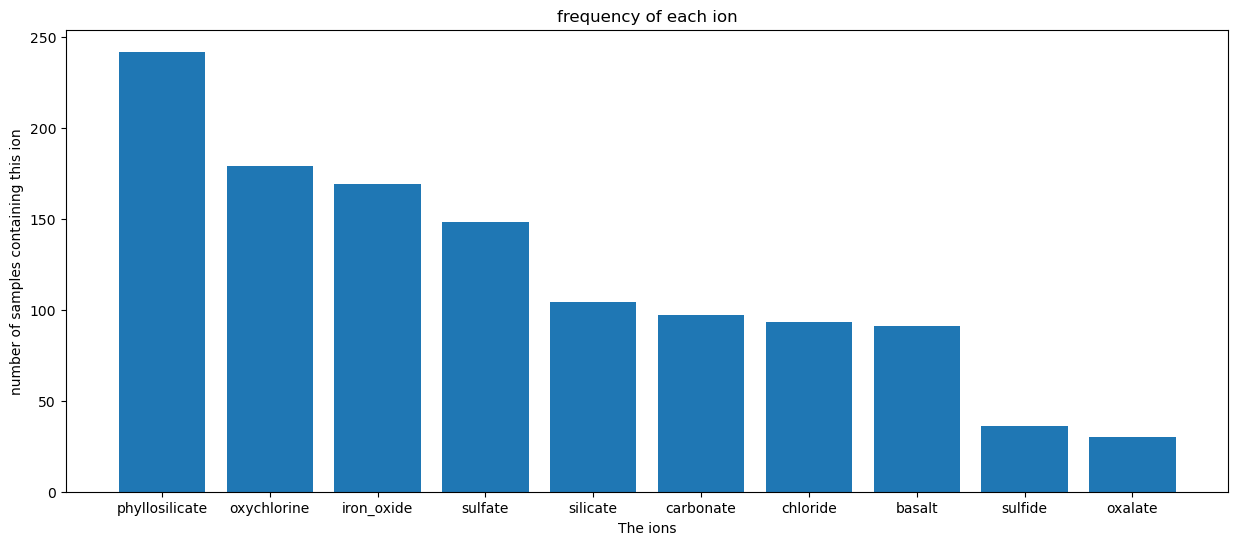

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))

plt.bar( sums_normalized.index.values, sums_normalized.values)

plt.title('frequency of each ion')

plt.xlabel("The ions")

plt.ylabel("number of samples containing this ion")

plt.show()



## The Samples
Here we explore the information contained in files corresponding to individual samples.

For a collection of samples we plot temperature as a function of time.

In [ ]:
from random import sample as smp

nrows = 4
ncols = 4

# creates a list of samples with nrows*ncols elements

samples_list = smp(list(train_files.keys()),nrows*ncols)



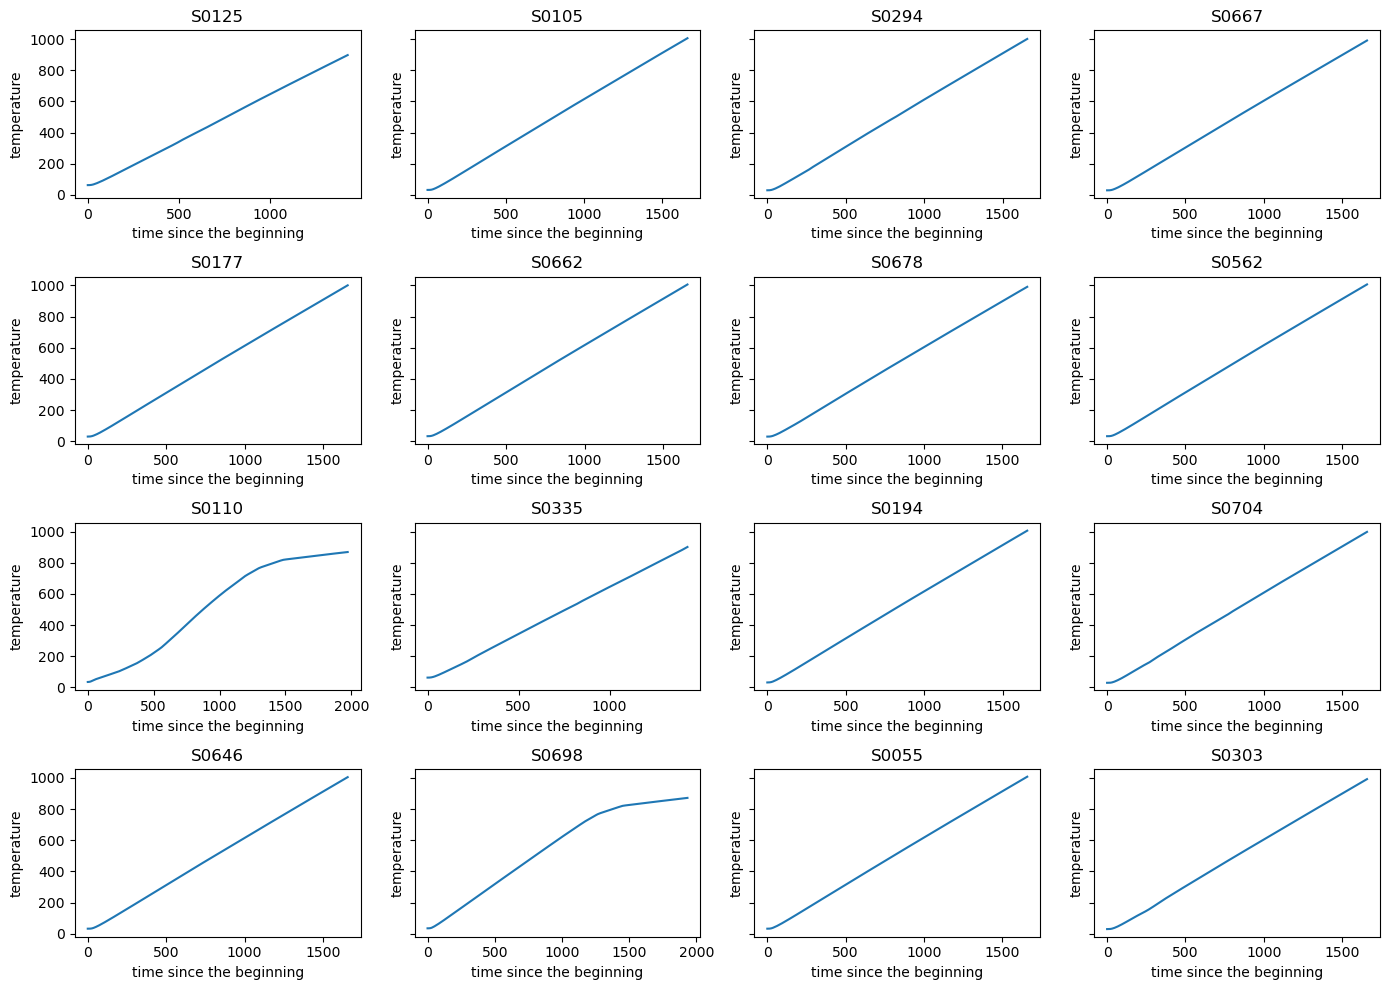

In [ ]:
# Create a figure and an array of subplots indexed using axis

fig, ax = plt.subplots(nrows = nrows,ncols = ncols,sharey = True,figsize = (10*nrows,10*ncols))


for i, sample in enumerate(samples_list): 

    plt.subplot(nrows,ncols,i+1)

    df = pd.read_csv(train_files[sample])

    plt.plot(df.time,df.temp)
       
    plt.xlabel('time since the beginning')
    
    plt.ylabel('temperature')
    
    plt.title(sample)



fig.set_size_inches(14,10)



fig.tight_layout()

plt.show()



We notice that the temperature is increasing with time in the samples above

## Abundance grouped by m/z

Now we plot the various ions grouped by m/z, on a logarithmic scale.

/var/folders/sb/bm5l_dgs6vg61tdy4phf0vcm0000gn/T/ipykernel_17812/552656145.py:47: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


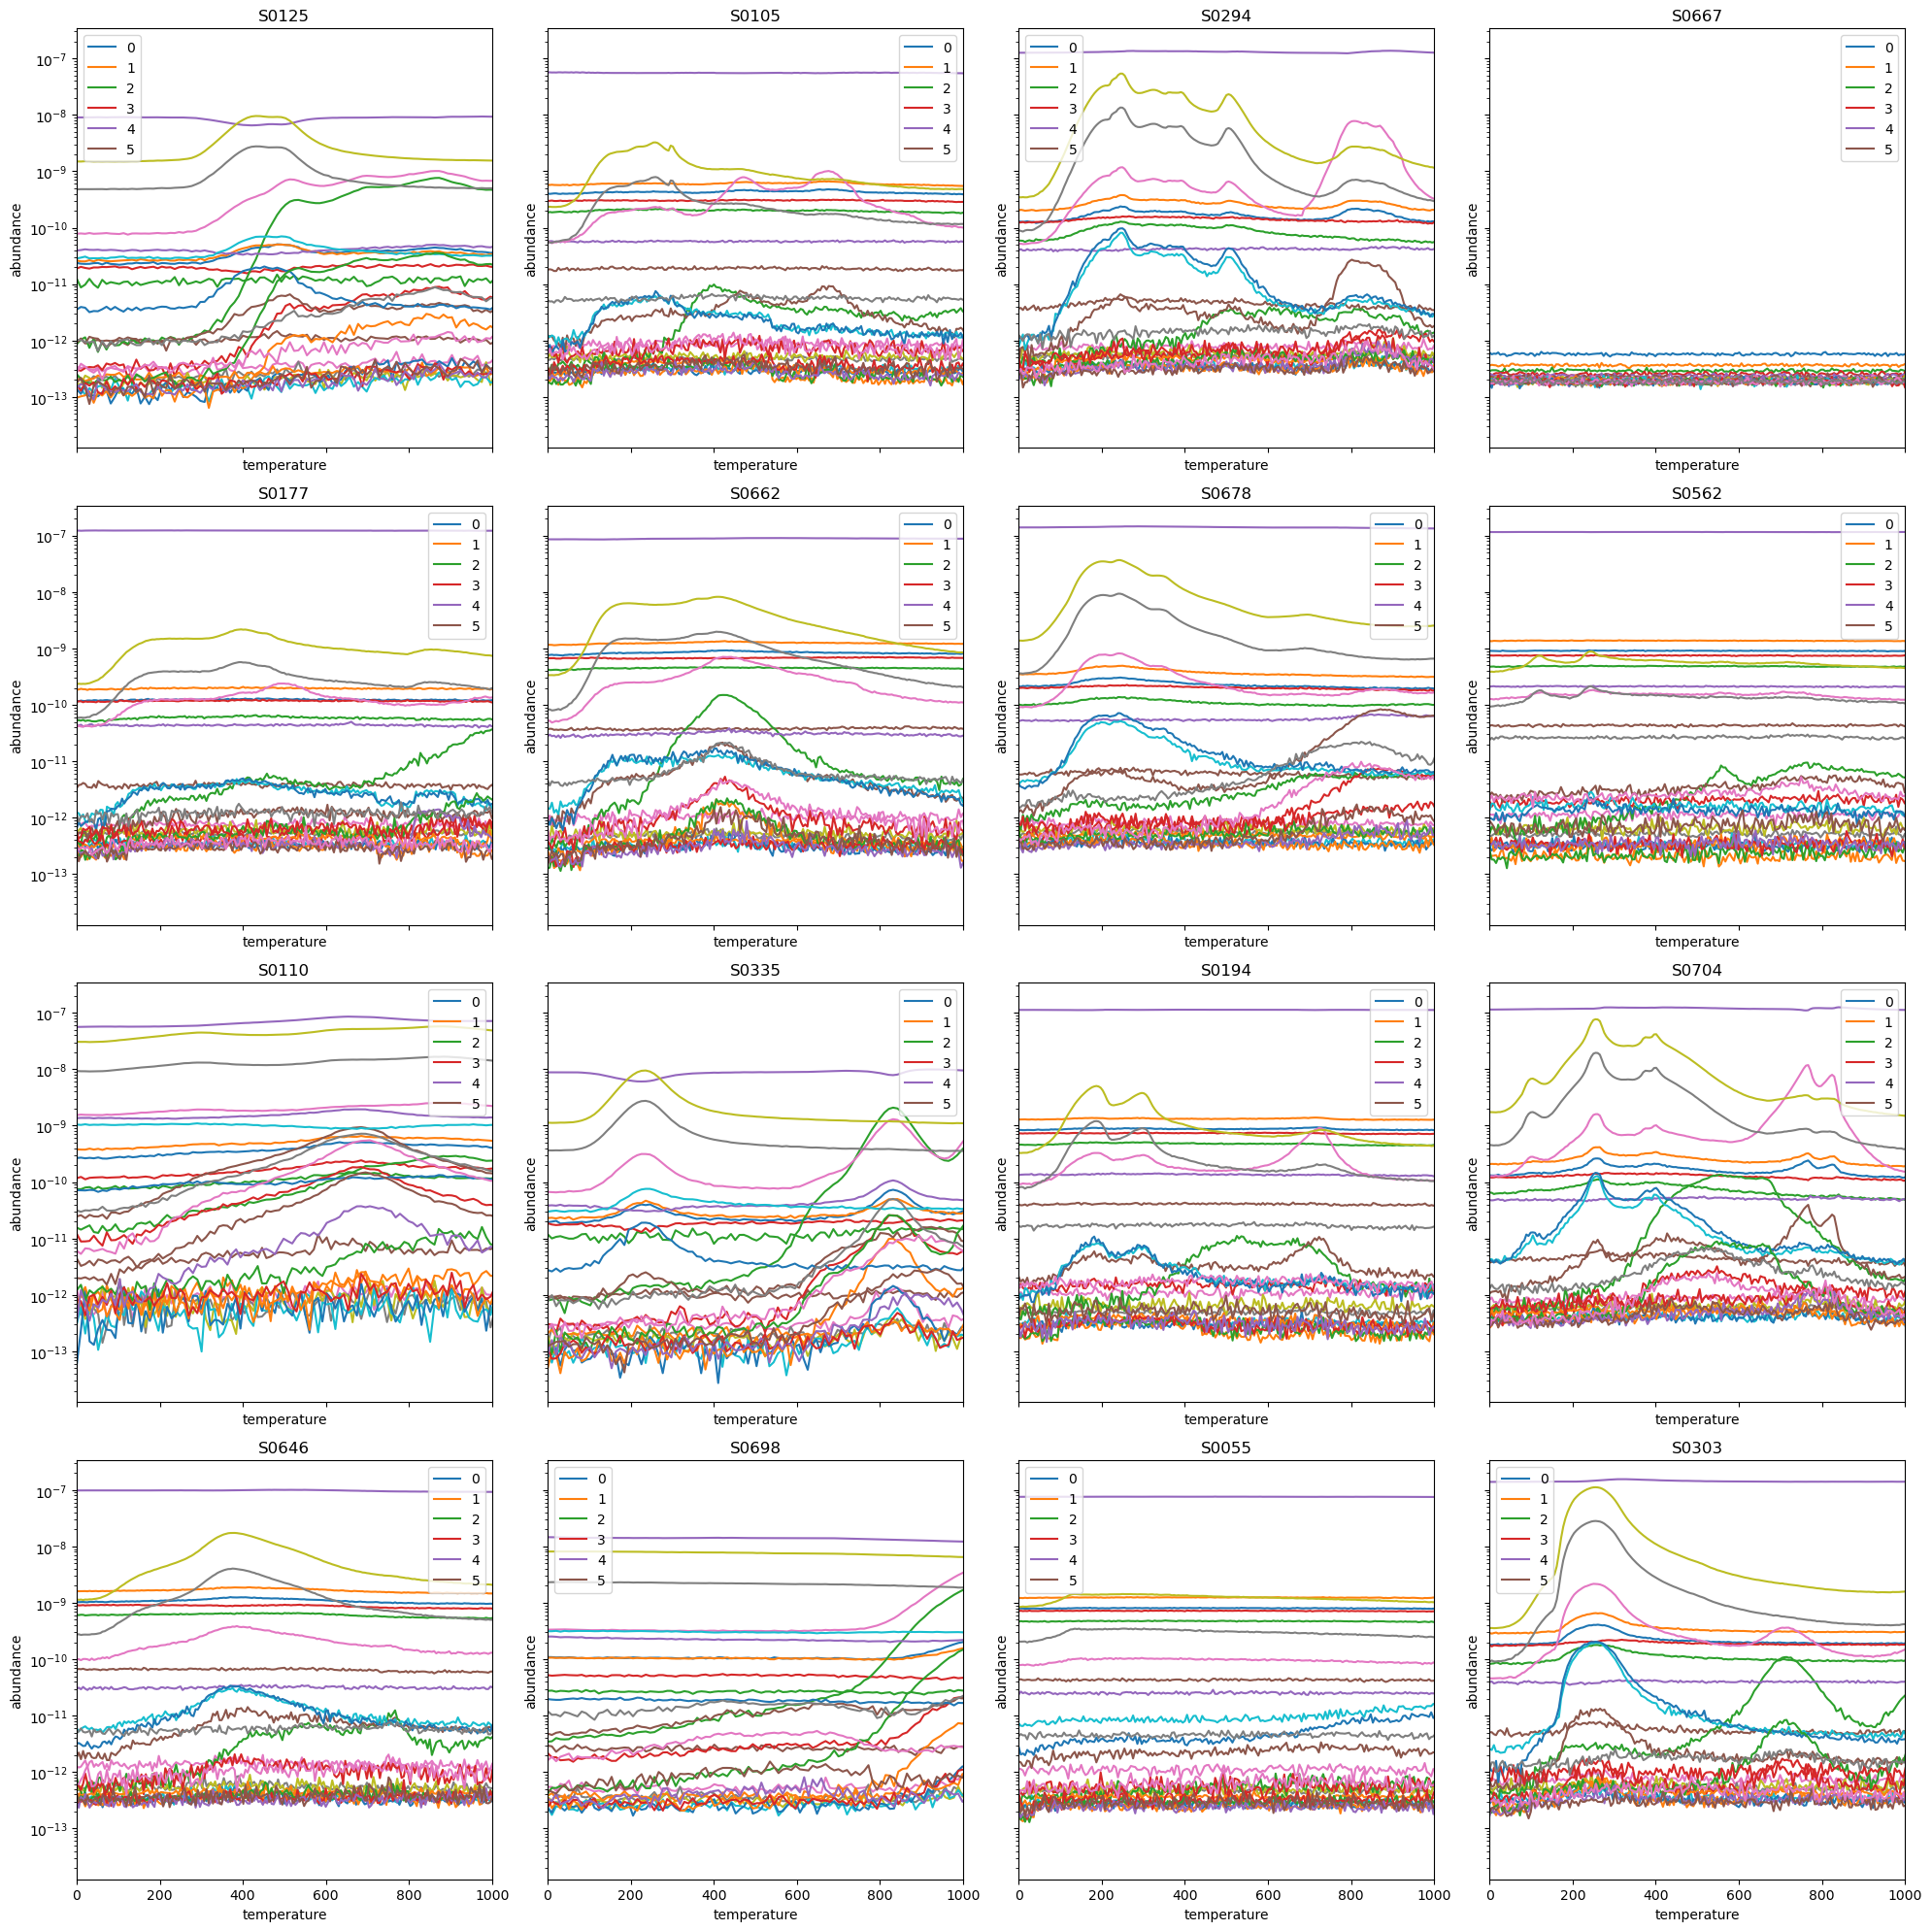

In [ ]:
nrows = 4
ncols = 4
num_samples = nrows*ncols

fig, ax = plt.subplots(nrows,ncols,sharex = True,sharey = True,figsize = (5* nrows,5* ncols))


for i, sample in enumerate(samples_list):

    df = pd.read_csv(train_files[sample])
    

    plt.subplot(nrows,ncols,i+1)

    

    for mz in range(0,28):
        X = df[df['m/z'] == mz].time
        y = df[df['m/z'] == mz].abundance

        # We show a legend only for the first few values of mz in order to not clutter the picture
             
        if mz<=5:
            plt.plot(X,y,label = str(mz))
        else:
            plt.plot(X,y,label = "")
       

        plt.xlabel('temperature')
        plt.ylabel('abundance')
        plt.xlim(0,1000)
        
        # ax[i] = plt.show()
    
    plt.legend()


    
    plt.yscale('log')
    plt.title(sample)
    
    del df


fig.tight_layout()     
    
fig.show()






## Preprocessing the data

### The preprocessing functions
We do some data cleaning, using some ideas suggested by the organizers of the competition here: https://drivendata.co/blog/mars-spectrometry-benchmark/. Note that the part about removing non-integer values of m/z is probably not relevant to us, it seems that it only applies to SAM samples, which we do not have access to.

In [ ]:
# This function takes in a dataframe with a column named m/z and returns a new dataframe where all entries 
# with non-integer value of m/z have been removed, as well as all entries corresponding to m/z equal to 4 or larger than 100

def drop_non_int_and_He(df):
    df2 = df
    df2 = df2[df2['m/z'].transform(round) == df2['m/z']]
    df2 = df2[df2['m/z']<100]
    df2 = df2[df2['m/z'] != 4]
    return df2

# This function takes in a dataframe with columns named m/z and abundance and transforms by subtracting 
# the minimal value of abundance, corresponding to each m/z

def subtract_min(df):    

    df["abundance_minsub"] = df.groupby(["m/z"])["abundance"].transform(
        lambda x: (x - x.min())
    )
    return df
# notice that the function above does not keep a copy of the original dataframe, it transforms it


The next function scales the abundances by the formula $\frac{x-x_{\mathrm{min}}}{x_{max}-x_{min}}$ and forces them to be in the range (0,1)

In [ ]:
from sklearn.preprocessing import minmax_scale

def scale_to_zero_one(df):
    df['zero_one_rescale'] = minmax_scale(df['abundance_minsub'])
    assert (df['zero_one_rescale'].max()<=1)
    return df
    
# notice that the function above does not keep a copy of the original dataframe, it transforms it

The following combines the procedures above

In [ ]:
def preprocess(df):
    return scale_to_zero_one(subtract_min(drop_non_int_and_He(df)))

# The first function applied to df above creates and returns a copy of its input, whereas the other two
#  modify the input. So at the end, the original dataframe stays unchanged

We can check the above for some sample

In [ ]:
# Load a csv
S0041 = pd.read_csv(train_files['S0041'])

# Store it temporarily
S0041temp = S0041

# Preprocess
S0041mod = preprocess(S0041)

# Check that the original is unchanged
S0041.equals(S0041temp)

True

### Plots of preprocessed data  
We make a plot to check if our preprocessing worked as intended. In the left column we 

In [ ]:
num_samples = 3

from random import sample as smp 

samples_list = smp(list(train_files.keys()),3) # create a list of samples to plot

fig, ax = plt.subplots(num_samples,2,sharex = True,figsize = (10,5*num_samples))

for i, sample in enumerate(samples_list):

    df = pd.read_csv(train_files[sample])

    df_mod = preprocess(df)

    plt.subplot(num_samples,2,2*i+1)    

    for mz in range(0,28):
        # in the first column we have unprocessed data
        X = df[df['m/z'] == mz].temp
        y = df[df['m/z'] == mz].abundance

        # We show a legend only for the first few values of mz in order to not clutter the picture
             
        if mz<=5:
            plt.plot(X,y,label = str(mz))
        else:
            plt.plot(X,y,label = "")       
        

        plt.xlabel('temperature')
        plt.ylabel('abundance')
        plt.xlim(0,1000)
        plt.title(sample)

        plt.legend()

        plt.title(sample)
        
        # ax[i] = plt.show()
        plt.yscale('linear')

    # In the second row we plot the processed data
    
    plt.subplot(num_samples,2,2*i+2)    

    for mz in range(0,28):
        X = df_mod[df_mod['m/z'] == mz].temp
        y = df_mod[df_mod['m/z'] == mz].zero_one_rescale

        # We show a legend only for the first few values of mz in order to not clutter the picture
             
        if mz<=5:
            plt.plot(X,y,label = str(mz))
        else:
            plt.plot(X,y,label = "")       
        

        plt.xlabel('temperature')
        plt.ylabel('renormalized abundance  ')
        plt.xlim(0,1000)
        plt.ylim(0,1)
        plt.title(sample)
        
        # ax[i] = plt.show()
    
        plt.legend()


    
        plt.yscale('linear')
    
    

fig.tight_layout()     
    
fig.show()



